In [ ]:
#Romberg
import numpy as np
def f(x):
  return 1/np.sqrt(x**2 + 1)
def trapezoid(f,a,b,n):
  h = (b-a)/(n-1)
  xs = a + np.arange(n)*h
  cs = np.ones(n); cs[0] = 0.5; cs[-1] = 0.5
  contribs = cs*f(xs)
  return h*np.sum(contribs)
def prettyprint(row):
  for elem in row:
    print("{0:1.10f} ".format(elem),end="")
  print("")
def richardson(Rprev, Rincurr0, i):
  Rcurr = [Rincurr0]
  for j in range(1, i+1):
    val = (4**j*Rcurr[j-1] - Rprev[j-1])/(4**j - 1)
    Rcurr.append(val)
  return Rcurr
def romberg(f,a,b,imax = 20,tol = 1.e-8):
  n = 2
  val = trapezoid(f,a,b,n)
  Rprev = [val]
  prettyprint(Rprev)
  for i in range(1,imax):
    nprime = 2*n-1
    Rincurr0 = trapezoid(f,a,b,nprime)
    Rcurr = richardson(Rprev, Rincurr0, i)
    prettyprint(Rcurr)
    err = abs(Rprev[-1] - Rcurr[-1])/abs(Rcurr[-1])
    valprime = Rcurr[-1]
    if err < tol:
      break
    n = nprime
    Rprev = Rcurr[:]
  else:
    valprime = None
  return valprime
ans = np.log(1 + np.sqrt(2))
print(ans)
print(romberg(f,0.,1.))

0.8813735870195429
0.8535533906 
0.8739902908 0.8808025909 
0.8795307704 0.8813775970 0.8814159307 
0.8809131418 0.8813739323 0.8813736880 0.8813730175 
0.8812584924 0.8813736093 0.8813735877 0.8813735861 0.8813735884 
0.8813448144 0.8813735884 0.8813735870 0.8813735870 0.8813735870 0.8813735870 
0.8813735870215318


Gauss Legendre quadrature

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
  return 1/np.sqrt(x**2 + 1)
#Get derivatives of Legendre polynomial which are needed for weights
def legendre(n,x):
  if n==0:
    val2 = 1.
    dval2 = 0.
  elif n==1:
    val2 = x
    dval2 = 1.
  else:
    val0 = 1.; val1 = x
    for j in range(1,n):
      val2 = ((2*j+1)*x*val1 - j*val0)/(j+1)
      val0, val1 = val1, val2
    dval2 = n*(val0-x*val1)/(1.-x**2)
  return val2, dval2
def legnewton(n,xold,kmax=200,tol=1.e-8):
  for k in range(1,kmax):
    val, dval = legendre(n,xold)
    xnew = xold - val/dval
    xdiff = xnew - xold
    if abs(xdiff/xnew) < tol:
      break
    xold = xnew
  else:
    xnew = None
  return xnew
def legroots(n):
  roots = np.zeros(n)
  npos = n//2
  for i in range(npos):
    xold = np.cos(np.pi*(4*i+3)/(4*n+2))
    root = legnewton(n,xold)
    roots[i] = -root
    roots[-1-i] = root
  return roots
def gauleg_params(n):
  xs = legroots(n)
  cs = 2/((1-xs**2)*legendre(n,xs)[1]**2)
  return xs, cs
def gauleg(f,a,b,n):
  xs, cs = gauleg_params(n)
  coeffp = 0.5*(b+a)
  coeffm = 0.5*(b-a)
  ts = coeffp + coeffm*xs
  contribs = cs*f(ts)
  return coeffm*np.sum(contribs)
ans = np.log(1 + np.sqrt(2))
print(ans)
for n in range(2,10):
    print(n, gauleg(f,0.,1,n))

0.8813735870195429
2 0.8817898064445451
3 0.881331201937916
4 0.8813752230725129
5 0.8813735706987258
6 0.8813735849145596
7 0.8813735871721439
8 0.8813735870147532
9 0.8813735870195203


Python code example using Euler’s Method to solve a simple first-order ODE:

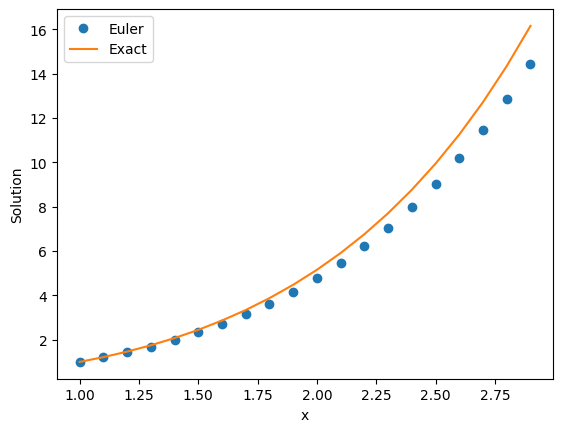

In [7]:
import numpy as np

def f(x, y):  # define the ODE function
    return x + y
def euler_method(x0, y0, xN, h):
    x = np.arange(x0, xN, h)  # time points
    y = np.zeros((len(x),))  # initialize solution array
    y[0] = 1  # set initial condition

    for i in range(1, len(x)):
        y[i] = y[i-1] + h * f(x[i-1], y[i-1])

    return x, y
x0 = 1
y0=1
xN = 3
h=0.1
x, y = euler_method(x0, y0, xN, h)
yExact = -x-1+3*np.exp(x-1)
import matplotlib.pyplot as plt
plt.plot(x, y,'o',x,yExact,'-')
plt.legend(['Euler', 'Exact'])
plt.xlabel('x')
plt.ylabel('Solution')
plt.show()

Solving 2nd Order ODE with Euler's method

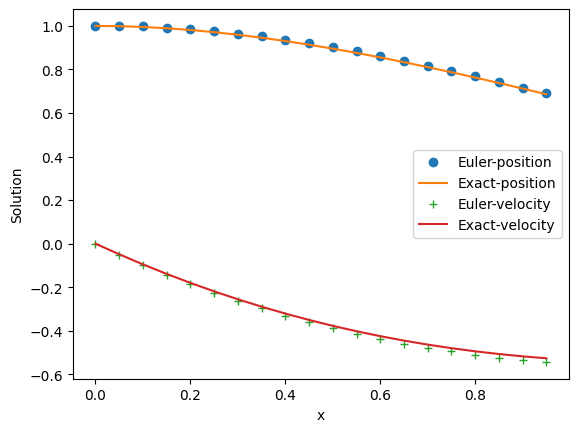

In [4]:
import numpy as np
def y0p(x,y0,y1):  # define the ODE function
    return y1
def y1p(x,y0,y1):
    return -y1-y0

def euler_method(x0, y0, y1, xN, h):
    x = np.arange(x0, xN, h)  # time points
    y0 = np.zeros((len(x),))  # initialize solution array
    y1 = np.zeros((len(x),))  # initialize solution array
    y0[0] = 1  # set initial condition
    y1[0] = 0  # set initial condition

    for i in range(1, len(x)):
        y0[i] = y0[i-1] + h * y0p(x[i-1],y0[i-1],y1[i-1])
        y1[i] = y1[i-1] + h * y1p(x[i-1],y0[i-1],y1[i-1])
    return x, y0,y1
x0 = 0
y0 = 1  # initial condition
y1 = 0  # initial condition
xN = 1
h = 0.05  # step size

x, y0,y1 = euler_method(x0, y0, y1,xN, h)
y0Exact = np.exp(-x/2)*(np.cos(np.sqrt(3)*x/2)+(1/np.sqrt(3))*np.sin(np.sqrt(3)*x/2))
y1Exact = -2*np.exp(-x/2)*(np.sin(np.sqrt(3)*x/2))/(np.sqrt(3))
import matplotlib.pyplot as plt
plt.plot(x, y0,'o',x,y0Exact,'-',x,y1,'+',x,y1Exact,'-')
plt.legend(['Euler-position', 'Exact-position','Euler-velocity','Exact-velocity'])
plt.xlabel('x')
plt.ylabel('Solution')

plt.show()

RK 2

Eulers modified method

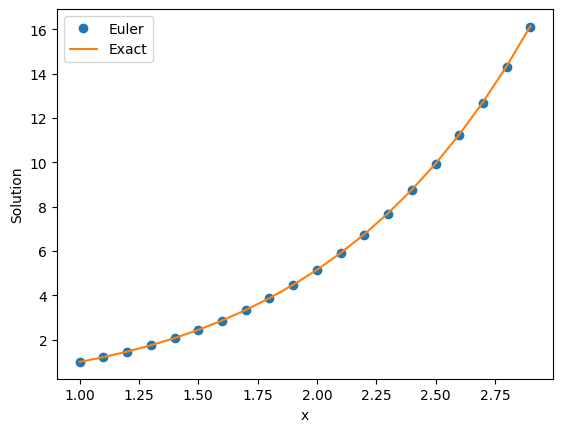

In [6]:
import numpy as np
def f(x, y):  # define the ODE function
    return x + y
def euler_mod(x0, y0, xN, h):
    x = np.arange(x0, xN, h)  # time points
    y = np.zeros((len(x),))  # initialize solution array
    K=np.zeros((len(x),))
    y[0] = 1  # set initial condition
    for i in range(1, len(x)):
        K[i] = y[i-1] + h*f(x[i-1], y[i-1])
        y[i] = y[i-1] + (h/2) * (f(x[i-1], y[i-1])+f(x[i], K[i]))

    return x, y
x0 = 1
y0 = 1
xN = 3
h = 0.1

x, y = euler_mod(x0, y0, xN, h)
yExact = -x-1+3*np.exp(x-1)
import matplotlib.pyplot as plt
plt.plot(x, y,'o',x,yExact,'-')
plt.legend(['Euler', 'Exact'])
plt.xlabel('x')
plt.ylabel('Solution')
plt.show()

Solving 2nd order ODE using RK2(Modified Euler)

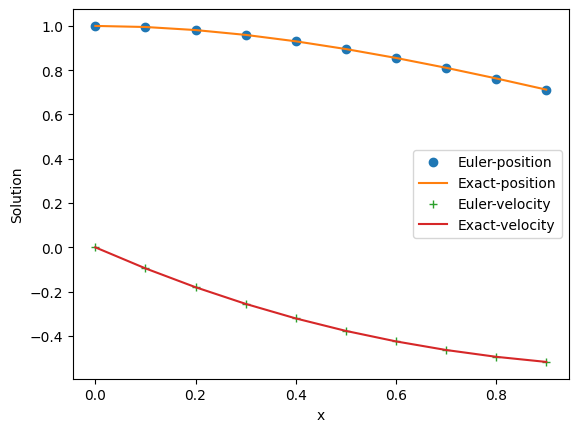

In [9]:
import numpy as np
def y0p(x,y0,y1):  # define the ODE function
    return y1
def y1p(x,y0,y1):
    return -y1-y0
def euler_mod(x0, y0, y1, xN, h):
    x = np.arange(x0, xN, h)  # time points
    y0 = np.zeros((len(x),))  # initialize solution array
    y1 = np.zeros((len(x),))
    K0  = np.zeros((len(x),)) # initialize solution array
    K1  = np.zeros((len(x),))
    y0[0] = 1  # set initial condition
    y1[0] = 0  # set initial condition

    for i in range(1, len(x)):
        K0[i] = y0[i-1] + h*y0p(x[i-1], y0[i-1],y1[i-1])
        K1[i] = y1[i-1] + h*y1p(x[i-1], y0[i-1],y1[i-1])
        y0[i] = y0[i-1] + (h/2) * (y0p(x[i-1], y0[i-1],y1[i-1])+y0p(x[i],K0[i],K1[i]))
        y1[i] = y1[i-1] + (h/2) * (y1p(x[i-1], y0[i-1],y1[i-1])+y1p(x[i],K0[i],K1[i]))
    return x, y0,y1
x0 = 0
y0 = 1
y1 = 0
xN = 1
h = 0.1
x, y0,y1 = euler_mod(x0, y0, y1,xN, h)
y0Exact = np.exp(-x/2)*(np.cos(np.sqrt(3)*x/2)+(1/np.sqrt(3))*np.sin(np.sqrt(3)*x/2))
y1Exact = -2*np.exp(-x/2)*(np.sin(np.sqrt(3)*x/2))/(np.sqrt(3))

import matplotlib.pyplot as plt
plt.plot(x, y0,'o',x,y0Exact,'-',x,y1,'+',x,y1Exact,'-')
plt.legend(['Euler-position', 'Exact-position','Euler-velocity','Exact-velocity'])
plt.xlabel('x')
plt.ylabel('Solution')

plt.show()
